In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn

In [2]:
df = pd.read_csv(r"C:\Users\Pavin Prakash\Desktop\Modular\data\Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df["total_spent"] = df["TV"] + df["newspaper"] + df["radio"]

<AxesSubplot:xlabel='total_spent', ylabel='sales'>

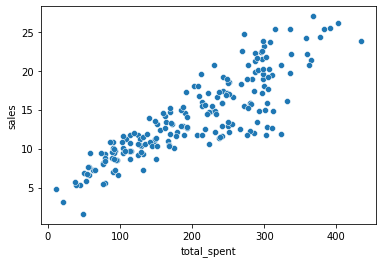

In [4]:
sns.scatterplot(data=df,x="total_spent",y="sales")

<AxesSubplot:xlabel='total_spent', ylabel='sales'>

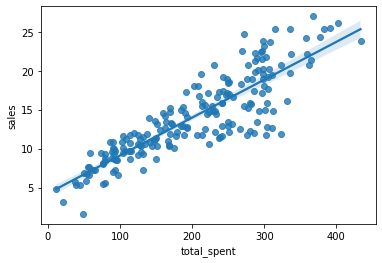

In [5]:
sns.regplot(x=df['total_spent'],y=df['sales'])


In [6]:
x=df["total_spent"]
y=df["sales"]
np.polyfit(x,y,deg=1)

array([0.04868788, 4.24302822])

In [7]:
print(df["total_spent"].max())
print(df["total_spent"].min())

433.59999999999997
11.7


In [8]:
random_spent = np.linspace(0,500,100)
predicted_sales = 0.04868788*random_spent + 4.24302822

In [9]:
spent =300
predicted_sales_for_300 = 0.04868788*spent + 4.24302822

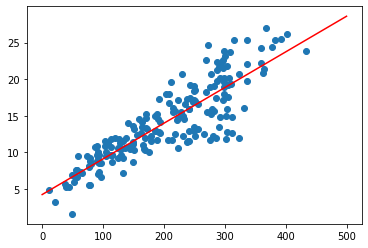

In [10]:
plt.scatter(data=df,x="total_spent",y="sales")
plt.plot(random_spent,predicted_sales,color="red")

In [11]:
np.polyfit(x,y,deg=3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [12]:
predicted_sales = 3.07615033e-07*random_spent**3 + -1.89392449e-04*random_spent**2 + 8.20886302e-02*random_spent + 2.70495053e+00

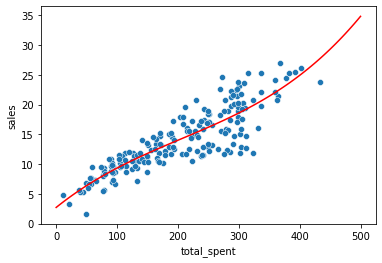

In [13]:
sns.scatterplot(data=df,x="total_spent",y="sales")
plt.plot(random_spent,predicted_sales,color="red")

In [14]:
x = df.drop(["total_spent", "sales"],axis=1)
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [15]:
y = df["sales"]
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=101,test_size=0.33)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [18]:
model.fit(x_train,y_train)

LinearRegression()

In [19]:
test_pred = model.predict(x_test)

In [20]:
error = y_test - test_pred

c:\Users\Pavin Prakash\anaconda3\envs\ML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

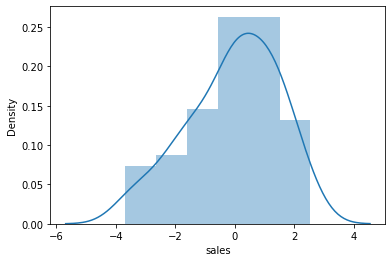

In [21]:
sns.distplot(error,kde=True)

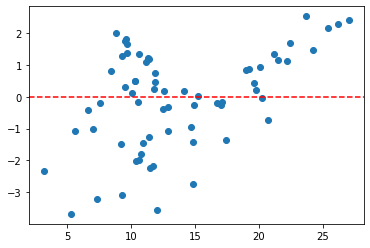

In [22]:
plt.scatter(y_test,error)
plt.axhline(y=0, ls="--",color="red")

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:
mean_squared_error(y_test,test_pred)

2.348375242713827

In [25]:
np.sqrt(mean_squared_error(y_test,test_pred))

1.532440942651242

In [26]:
mean_absolute_error(y_test,test_pred)

1.236918849425931

In [27]:
y_hat = model.predict(x)

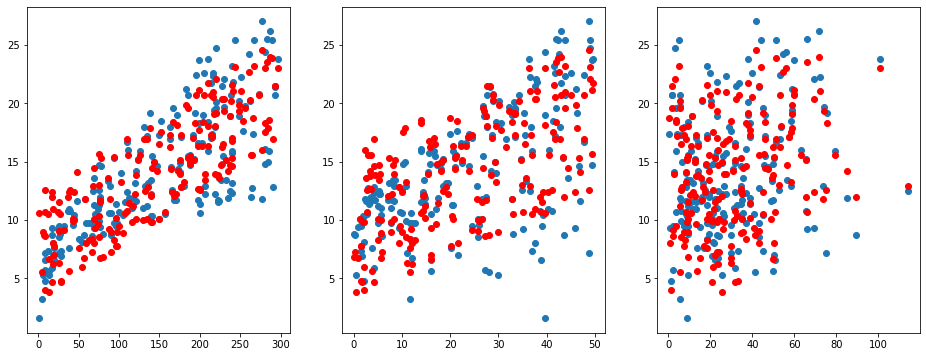

In [28]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df["TV"],df["sales"],"o")
axes[0].plot(df["TV"],y_hat,"o",color="red")

axes[1].plot(df["radio"],df["sales"],"o")
axes[1].plot(df["radio"],y_hat,"o",color="red")

axes[2].plot(df["newspaper"],df["sales"],"o")
axes[2].plot(df["newspaper"],y_hat,"o",color="red")

In [29]:
from joblib import dump,load

In [30]:
make_dir = "models"
os.makedirs(make_dir,exist_ok=True)
file_path = os.path.join(make_dir, "LR_model.joblib")
dump(model,file_path)

['models\\LR_model.joblib']

In [31]:
load_LR_model = load(r"C:\Users\Pavin Prakash\Desktop\Modular\Machine-Learning-1\Untitled Folder\models\LR_model.joblib")

In [32]:
load_LR_model.coef_

array([ 0.04458371,  0.18525166, -0.00122463])

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [34]:
poly_features = poly_converter.fit_transform(x)

In [35]:
x_train,x_test,y_train,y_test = train_test_split(poly_features,y,random_state=101,test_size=0.33)

In [36]:
poly_model = LinearRegression()
poly_model.fit(x_train,y_train)

LinearRegression()

In [37]:
train_pred = poly_model.predict(x_train)
test_pred = poly_model.predict(x_test)

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [39]:
mean_absolute_error(y_test,test_pred)

0.393218528656395

In [40]:
mean_squared_error(y_test,test_pred)

0.3110577136477495

In [41]:
np.sqrt(mean_squared_error(y_test,test_pred))

0.5577254823367401

In [42]:
test_error = []
train_error = []

In [43]:
for i in range(1,10):
    poly_convertion = PolynomialFeatures(degree=i,include_bias=False)
    poly_features = poly_convertion.fit_transform(x)
    x_train,x_test,y_train,y_test = train_test_split(poly_features,y,random_state=101,test_size=0.33)
    model = LinearRegression()
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    train_error_1 = np.sqrt(mean_absolute_error(y_train,train_pred))
    test_error_1 = np.sqrt(mean_absolute_error(y_test,test_pred))

    train_error.append(train_error_1)
    test_error.append(test_error_1)

In [44]:
train_error

[1.1195184385758785,
 0.6402886063498301,
 0.5422370200480213,
 0.5005436983050323,
 0.4298806770920225,
 0.36459064674800695,
 1.8862017346163953,
 0.27841364634164745,
 0.18096183255080722]

In [45]:
test_error

[1.1121685346321983,
 0.695903048938252,
 0.6270713903985694,
 0.6241394112803442,
 0.8099773637196775,
 1.40984464164647,
 13.417801274077426,
 20.580411474014902,
 149.41029578035514]

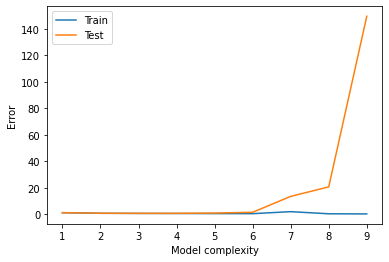

In [46]:
plt.plot(range(1,10),train_error,label="Train")
plt.plot(range(1,10),test_error,label="Test")
plt.xlabel("Model complexity")
plt.ylabel("Error")
plt.legend()

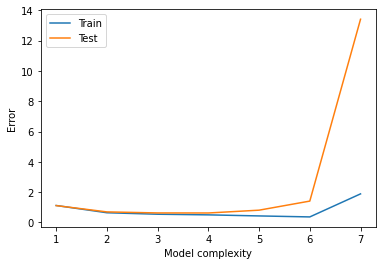

In [47]:
plt.plot(range(1,8),train_error[:7],label="Train")
plt.plot(range(1,8),test_error[:7],label="Test")
plt.xlabel("Model complexity")
plt.ylabel("Error")
plt.legend()

In [48]:
final_poly_converter = PolynomialFeatures(degree=4,include_bias=False)
final_poly_features = final_poly_converter.fit_transform(x)

In [49]:
x_train,x_test,y_train,y_test = train_test_split(final_poly_features,y,random_state=101,test_size=0.33)

In [50]:
final_poly_model = LinearRegression()

In [51]:
final_poly_model.fit(x_train,y_train)

LinearRegression()

In [52]:
test_pred = final_poly_model.predict(x_test)
train_pred = final_poly_model.predict(x_train)

In [53]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [54]:
np.sqrt(mean_squared_error(y_train,train_pred))


0.353291328203811

In [55]:
np.sqrt(mean_squared_error(y_test,test_pred))

0.5064297300349341

In [56]:
make_dir = "models"
os.makedirs(make_dir,exist_ok=True)
file_path = os.path.join(make_dir,"poly_model.joblib")
dump(final_poly_model, file_path)

['models\\poly_model.joblib']

In [64]:
load_poly_model = load(r"C:\Users\Pavin Prakash\Desktop\Modular\Machine-Learning-1\Untitled Folder\models\poly_model.joblib")

In [65]:
final_poly_model.coef_

array([ 1.31186148e-01,  1.19486026e-02, -4.42749933e-02, -1.11912849e-03,
        1.24187165e-03, -2.08186651e-04,  2.46760071e-03,  2.26765587e-03,
        1.75301553e-03,  4.55683440e-06, -3.45979082e-06,  2.02527107e-06,
        1.90209924e-05, -9.83875413e-06, -2.44256735e-06, -1.54276438e-04,
        7.62252411e-05, -1.33684423e-04,  7.83506587e-06, -6.72380835e-09,
        1.08802610e-08, -4.12825395e-09, -9.26767691e-08,  4.40280162e-08,
       -5.56054223e-09,  2.25613081e-07, -2.52932237e-07,  1.98208117e-07,
       -1.91031813e-08,  1.56676179e-06, -1.02306653e-06,  9.76029121e-07,
        4.05522244e-07, -1.02789708e-07])

In [66]:
load_model.coef_

array([ 1.31186148e-01,  1.19486026e-02, -4.42749933e-02, -1.11912849e-03,
        1.24187165e-03, -2.08186651e-04,  2.46760071e-03,  2.26765587e-03,
        1.75301553e-03,  4.55683440e-06, -3.45979082e-06,  2.02527107e-06,
        1.90209924e-05, -9.83875413e-06, -2.44256735e-06, -1.54276438e-04,
        7.62252411e-05, -1.33684423e-04,  7.83506587e-06, -6.72380835e-09,
        1.08802610e-08, -4.12825395e-09, -9.26767691e-08,  4.40280162e-08,
       -5.56054223e-09,  2.25613081e-07, -2.52932237e-07,  1.98208117e-07,
       -1.91031813e-08,  1.56676179e-06, -1.02306653e-06,  9.76029121e-07,
        4.05522244e-07, -1.02789708e-07])

In [60]:
make_dir = "models"
os.makedirs(make_dir,exist_ok=True)
file_path = os.path.join(make_dir, "poly_converter.joblib")
dump(final_poly_converter,file_path)

['models\\poly_converter.joblib']

In [67]:
load_poly_conveter = load(r"C:\Users\Pavin Prakash\Desktop\Modular\Machine-Learning-1\Untitled Folder\models\poly_converter.joblib")

In [68]:
load_poly_conveter

PolynomialFeatures(degree=4, include_bias=False)

In [69]:
load_poly_model

LinearRegression()

In [70]:
load_model

LinearRegression()

In [71]:
poly_model

LinearRegression()